# Pulsar Emission Data Analysis

In [30]:
#currently including any and all Imports that maybe needed for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from scipy import stats
import statistics
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat

#### Section for extracting from a tar file. ####

##### Currently implemented for original TAR File structure.

In [31]:
#This is also found in the main file under tarunzip.py
import tarfile
import os
import sys

#tar = tarfile.open("pulseTarFile.tar")
#tar.extractall('./Data')
#tar.close()

## Beginning of Exploration

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [32]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar6 = pd.read_csv("Data/J1243-6423.pulses", sep = ' ', header = None, names = colnames)

In [33]:
pulsar6.shape

(1819, 3)

In [34]:
pulsar6.head(25)

,Pulse Number,Brightness,Uncertainty
0,1,0.101127,0.001893
1,2,0.012166,0.001814
2,3,0.021918,0.001835
3,4,0.181179,0.002183
4,5,0.000240,0.001725
5,6,0.085866,0.001723
6,7,0.067280,0.001778
7,8,0.092884,0.002438
8,9,0.083350,0.002101
9,10,0.087871,0.001941


In [35]:
pulsar6.describe()

,Pulse Number,Brightness,Uncertainty
count,1819.000000,1819.000000,1819.000000
mean,910.000000,0.075070,0.001958
std,525.244388,0.057006,0.000306
min,1.000000,-0.004643,0.001532
25%,455.500000,0.019738,0.001774
50%,910.000000,0.076660,0.001872
75%,1364.500000,0.112285,0.002041
max,1819.000000,0.269903,0.005952


In [36]:
pulsar6["Brightness"].describe()

count    1819.000000
mean        0.075070
std         0.057006
min        -0.004643
25%         0.019738
50%         0.076660
75%         0.112285
max         0.269903
Name: Brightness, dtype: float64

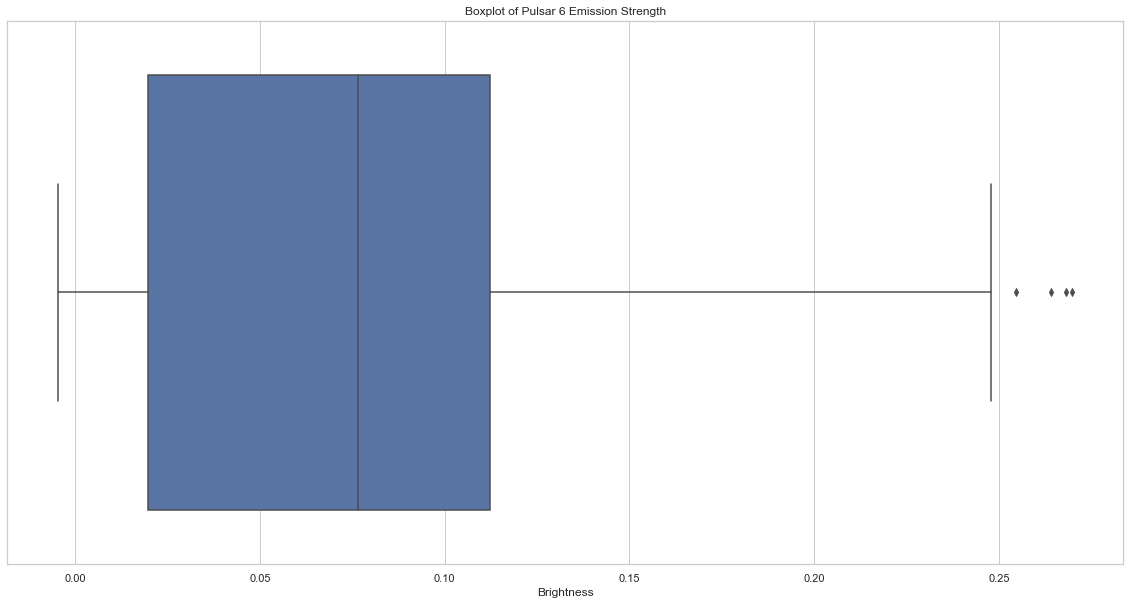

In [37]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

In [38]:
#numpy method of outlier removal

pulsar6npcleaned = pulsar6[(np.abs(stats.zscore(pulsar6["Brightness"])) <3)]
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty
0,1,0.101127,0.001893
1,2,0.012166,0.001814
2,3,0.021918,0.001835
3,4,0.181179,0.002183
4,5,0.000240,0.001725
...,...,...,...
1814,1815,0.105178,0.002086
1815,1816,0.064272,0.001995
1816,1817,0.000171,0.001730
1817,1818,-0.000924,0.001706


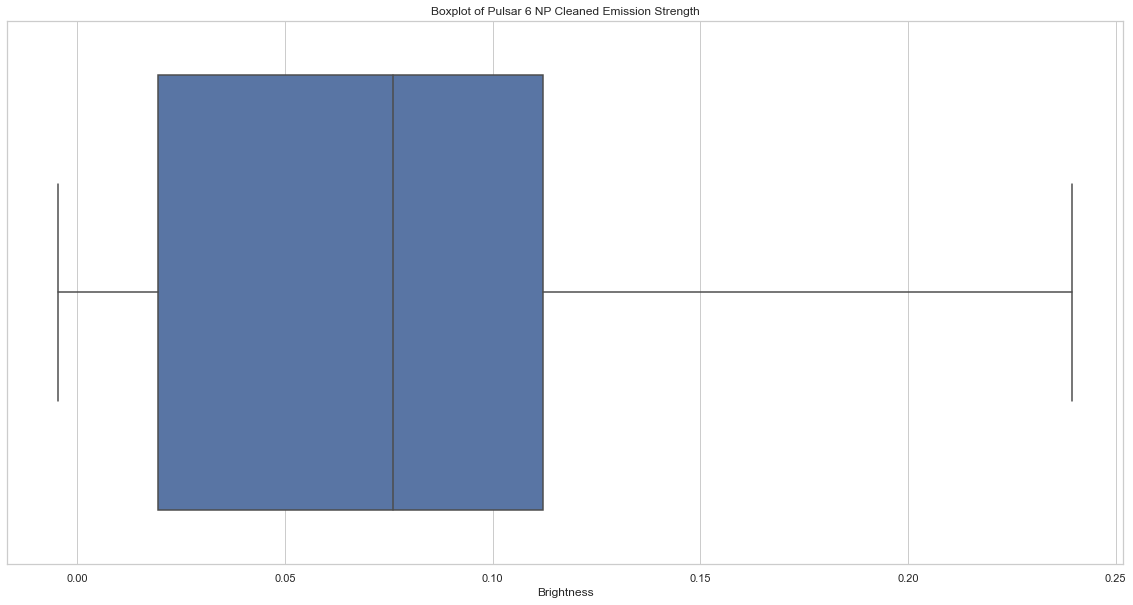

In [39]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6npcleaned["Brightness"]).set_title("Boxplot of Pulsar 6 NP Cleaned Emission Strength")

In [40]:
pulsar6npcleaned["Brightness"].describe()

count    1814.000000
mean        0.074558
std         0.056240
min        -0.004643
25%         0.019401
50%         0.076114
75%         0.112095
max         0.239634
Name: Brightness, dtype: float64

In [41]:
pulsar6npcleaned["Brightness"].median()

0.076114135

In [42]:
medianpulse6 = pulsar6["Brightness"].median()
print("Median of Pulsar6: ", medianpulse6)
pulsar6['Binary'] = np.where(pulsar6['Brightness'] > medianpulse6, 1, 0)

Median of Pulsar6:  0.07665979


In [43]:
pulsar6

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.101127,0.001893,1
1,2,0.012166,0.001814,0
2,3,0.021918,0.001835,0
3,4,0.181179,0.002183,1
4,5,0.000240,0.001725,0
...,...,...,...,...
1814,1815,0.105178,0.002086,1
1815,1816,0.064272,0.001995,0
1816,1817,0.000171,0.001730,0
1817,1818,-0.000924,0.001706,0


In [44]:
median = pulsar6npcleaned["Brightness"].median()
print("Median of Pulsar6 np cleaned: ", median)
pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)

Median of Pulsar6 np cleaned:  0.076114135


C:\Users\oxlay\AppData\Local\Temp/ipykernel_1408/1919336679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)


In [45]:
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.101127,0.001893,1
1,2,0.012166,0.001814,0
2,3,0.021918,0.001835,0
3,4,0.181179,0.002183,1
4,5,0.000240,0.001725,0
...,...,...,...,...
1814,1815,0.105178,0.002086,1
1815,1816,0.064272,0.001995,0
1816,1817,0.000171,0.001730,0
1817,1818,-0.000924,0.001706,0


c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


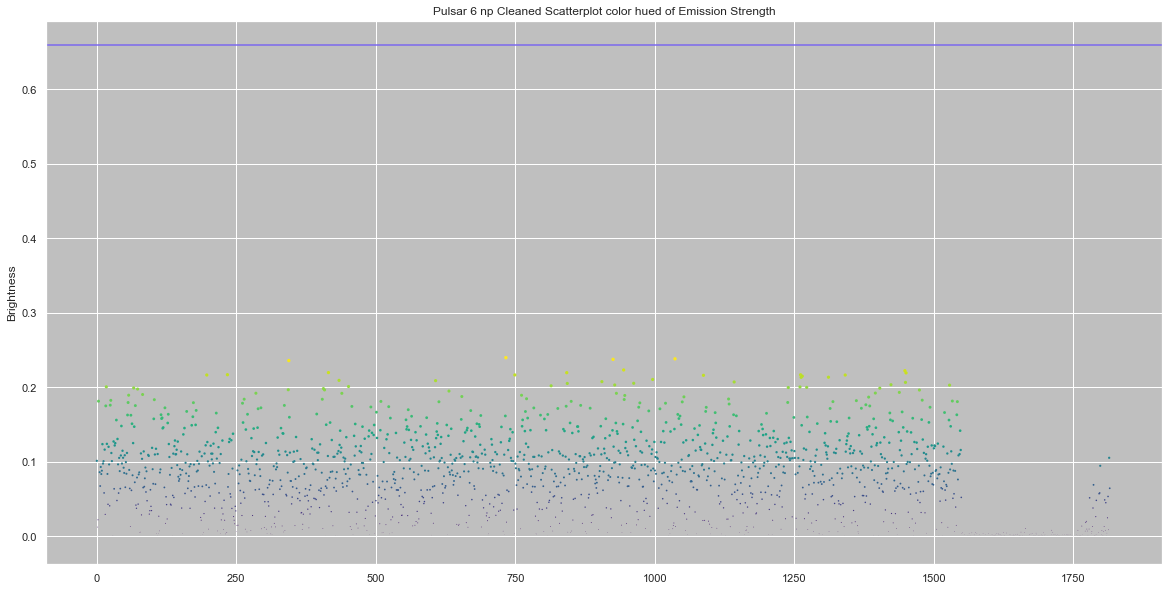

In [46]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6npcleaned.Brightness.values
ax = sns.scatterplot(data=pulsar6npcleaned["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6589028, ls='-',c='mediumslateblue')

In [47]:
print(len(pulsar6npcleaned[(pulsar6npcleaned.Brightness > 0.6589028)]))
print(len(pulsar6npcleaned[(pulsar6npcleaned.Brightness < 0.6589028)]))

0
1814


c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


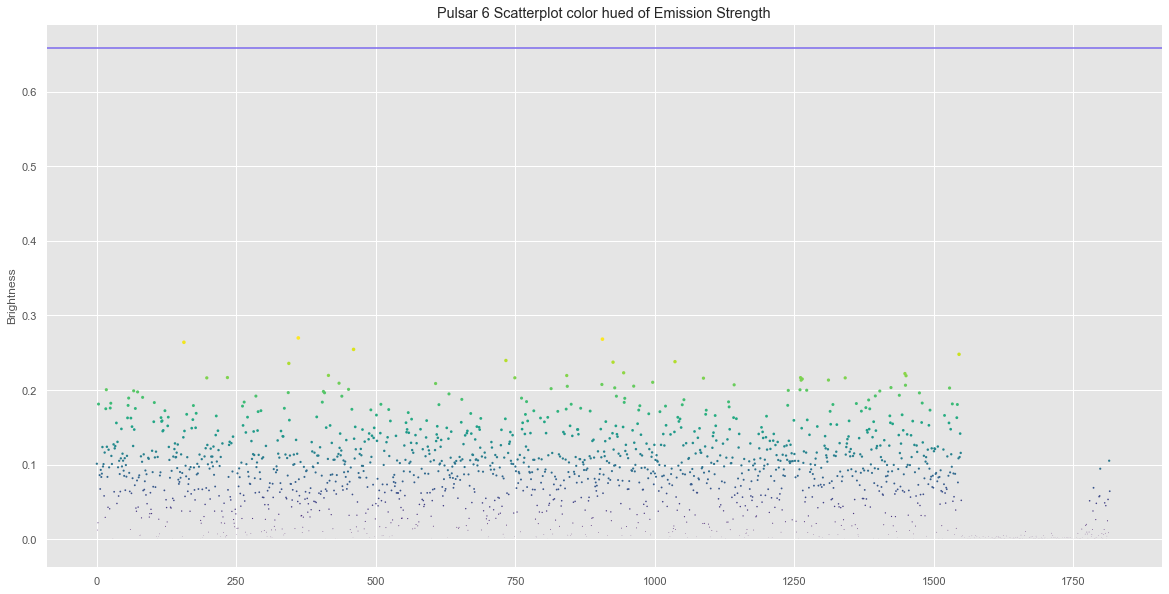

In [48]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')

In [49]:
print(len(pulsar6[(pulsar6.Brightness > 0.6589028)]))
print(len(pulsar6[(pulsar6.Brightness < 0.6589028)]))

0
1819


c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


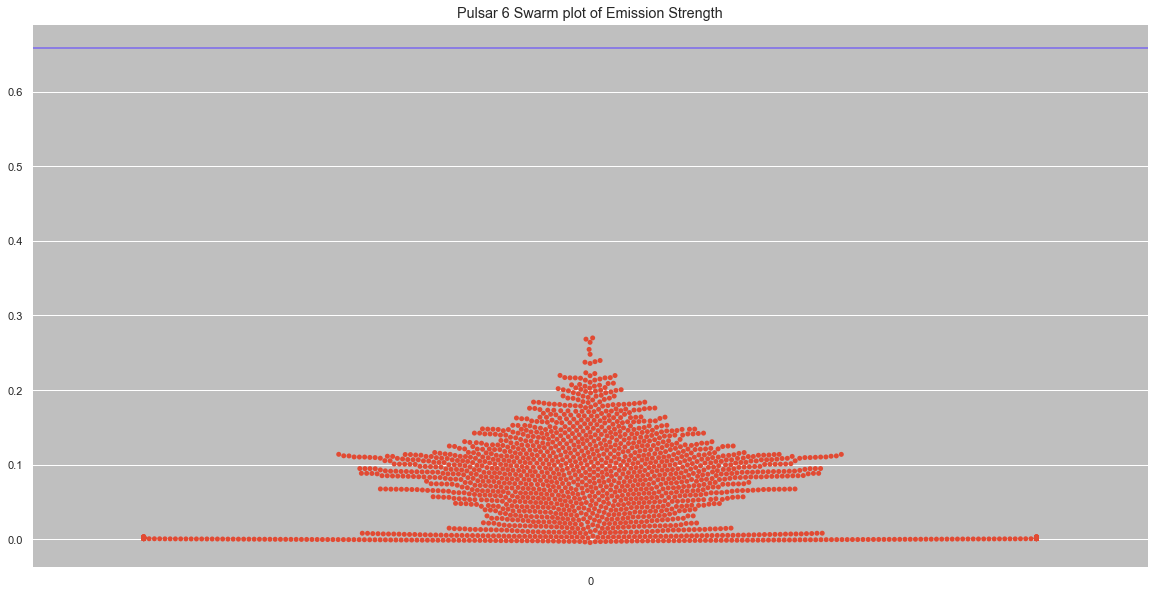

In [50]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
ax = plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=pulsar6["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')


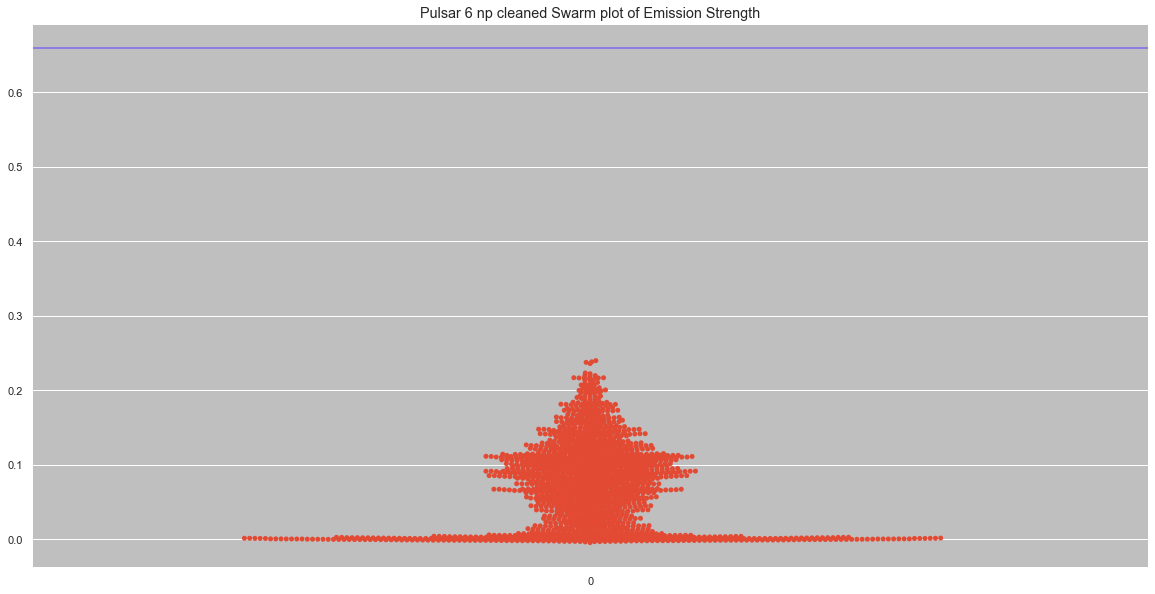

In [51]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6npcleaned.Brightness.values
ax = sns.swarmplot(data=pulsar6npcleaned["Brightness"]).set_title('Pulsar 6 np cleaned Swarm plot of Emission Strength')
ax = plt.axhline( y=0.6589028, ls='-', c='mediumslateblue')

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 Brightness')

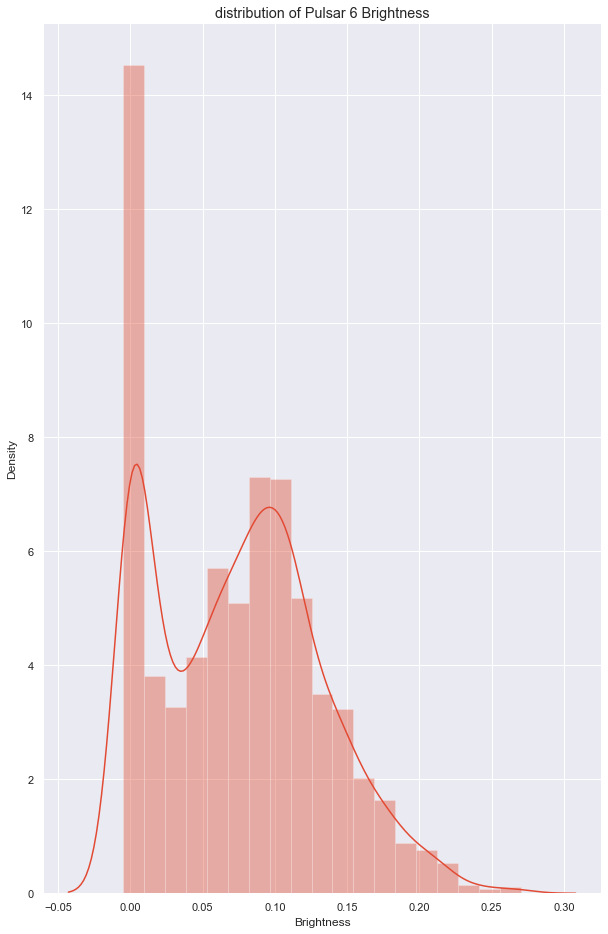

In [52]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Brightness)
plt.title("distribution of Pulsar 6 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned Brightness')

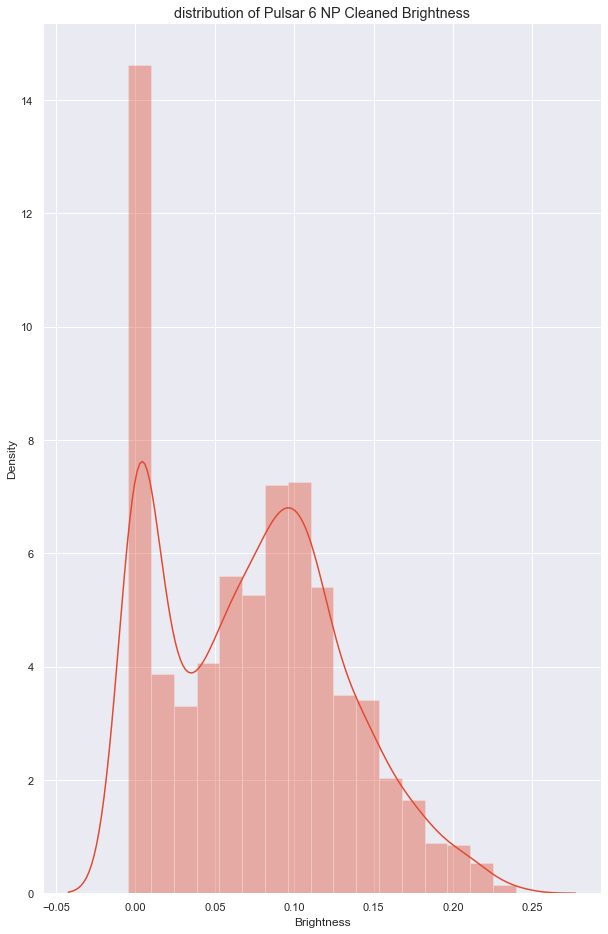

In [53]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Brightness)
plt.title("distribution of Pulsar 6 NP Cleaned Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned binary assignments')

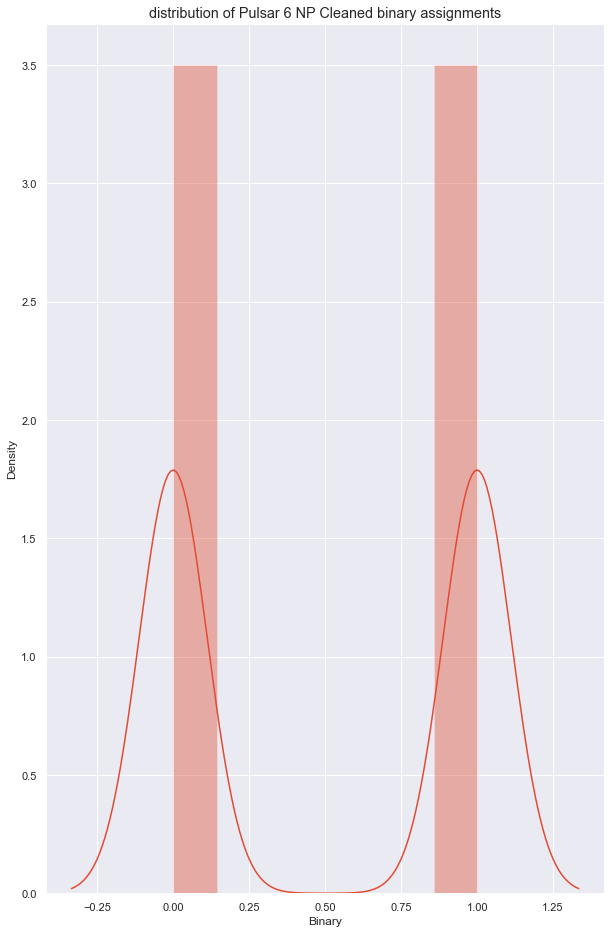

In [54]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Binary)
plt.title("distribution of Pulsar 6 NP Cleaned binary assignments")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 binary assignments')

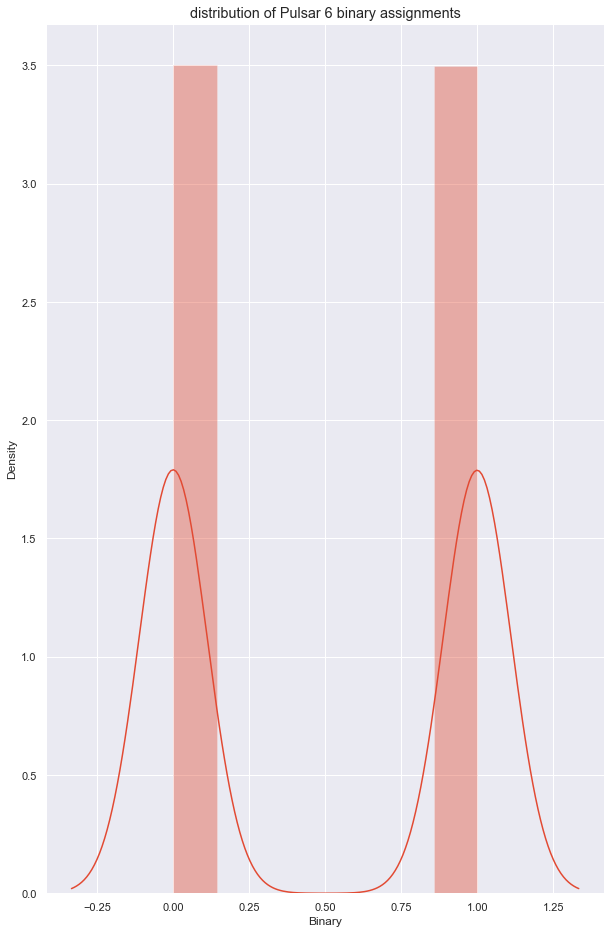

In [55]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Binary)
plt.title("distribution of Pulsar 6 binary assignments")

# Preliminary runs test
### Math Logic

$$ Z = {R - \tilde{R} \over s_{R}} $$

$$ \tilde{R} = {2_{n1 n2} \over n1 + n2} + 1 $$

$$  s^2_{R} = {2_{n1n2}(2{n1n2-n1-n2}) \over (n1+n2)^2(n1+n2-1) }$$

link to resource: https://www.geeksforgeeks.org/runs-test-of-randomness-in-python/

$ Z_{critical} = 1.96 $ as the confidence interval level of 95% thus this is a 2 tailed test. If the probability as corrosponding to this confidence interval $ H_{null} $ will be rejected as it is not statistically significant as denoted by $|Z| > Z_{critical} $

There is also code attempting to change it from a z-score probability to a P-score for ease of understanding and clarity.

# FUNCTION CODE FOR RUNS TEST

In [56]:
# MUST BE PASSED A LIST AND A INT/FLOAT 


def runsTest(data, dataMedian):
    runs = 0
    above = 0
    below = 0

    for i in range(len(data)):
        if(data[i] >= dataMedian and data[i-1] < dataMedian) or (data[i] < dataMedian and data[i-1] >= dataMedian):
            runs += 1
        
        if(data[i] >= dataMedian):
            above += 1
        
        else:
            below += 1
    
    R = ((2*above*below)/(above+below))+1
    #sdevTemp = (2*above*below*(2*above*below-above-below))/(((above+below)**2)*(above+below-1))
    #sdevTemp = (2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)*2)*(n1+n2-1))
    Sdev = math.sqrt((2*above*below*(2*above*below-above-below))/(((above+below)**2)*(above+below-1)))   

    float(Sdev)
    float(R)
    float(runs)
    z = (runs-R)/Sdev
    return z     

In [57]:
binaryData1 = pulsar6['Binary'].tolist()
print("pulsar6 original: ",binaryData1)

binaryData1nooutlier = pulsar6npcleaned['Binary'].tolist()
print("\n pulsar6 original: ", binaryData1nooutlier)

pulsar6 original:  [1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [58]:
print("Brightness Median Test")
Zscore = abs(runsTest(binaryData1, medianpulse6))
Pval = stats.norm.sf(abs(Zscore))*2
print('Z Statistic is: ', Zscore)
print('P Value is : ', Pval)

if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')

#print("Binary Median Test")
#binarymedian1 = pulsar6["Binary"].median()

#Zscore = abs(runsTest(binaryData1, binarymedian1))
#Pval = stats.norm.sf(abs(Zscore))*2
#print('Z Statistic is: ', Zscore)
#print('P Value is : ', Pval)

#if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

#if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')


print("Removed outliers from dataset")
Zscore = abs(runsTest(binaryData1nooutlier, median))
Pval = stats.norm.sf(abs(Zscore))*2
print('Z Statistic is: ', Zscore)
print('P Value is : ', Pval)

if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')

Brightness Median Test
Z Statistic is:  9.498558269626242
P Value is :  2.128162252369753e-21
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.
Removed outliers from dataset
Z Statistic is:  9.300286982281143
P Value is :  1.400671107546803e-20
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.


# Analysis of the preliminary data analysis

We can see here through our printouts the value of both Z Statistic based on the above Runs Test of Randomness and the approximate correlative P-value.

If the conditional prints are not activated it meants there is no statistical significance to reject the $H_{null}$

$ H_{null} $ is where the numbers are randomly generated and sequenced
-
$ H_{alt} $ is where the numbers are not randomly generated or sequenced
-


Further testing can be done with more variety of datasets with pythonic libraries and R librariest such as NIST and Rrandtest (placeholders cant remember their names)


# Below we begin autocorrelation and autocovariance analysis

To get started with this I am playing around with guide from: https://towardsdatascience.com/a-step-by-step-guide-to-calculating-autocorrelation-and-partial-autocorrelation-8c4342b784e8

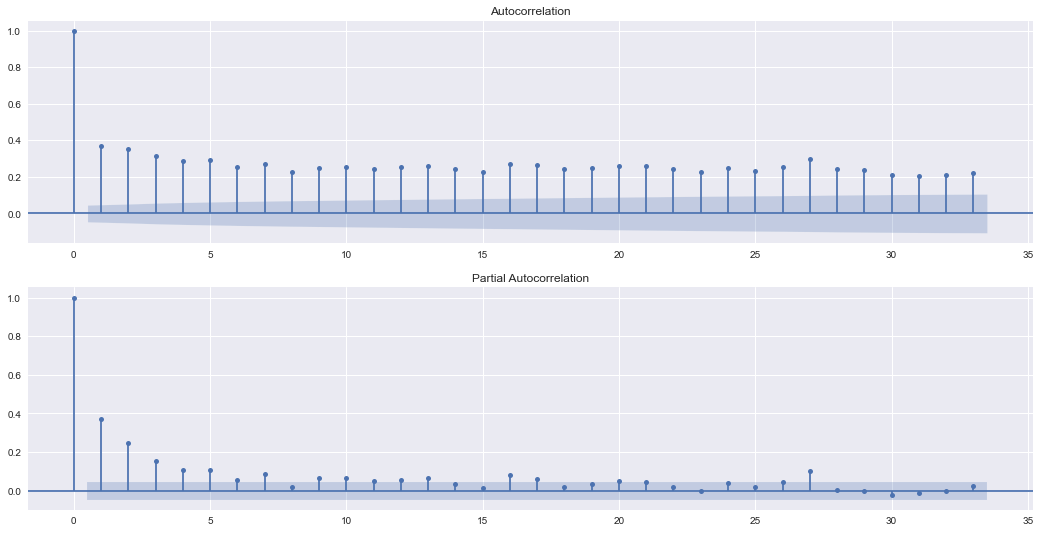

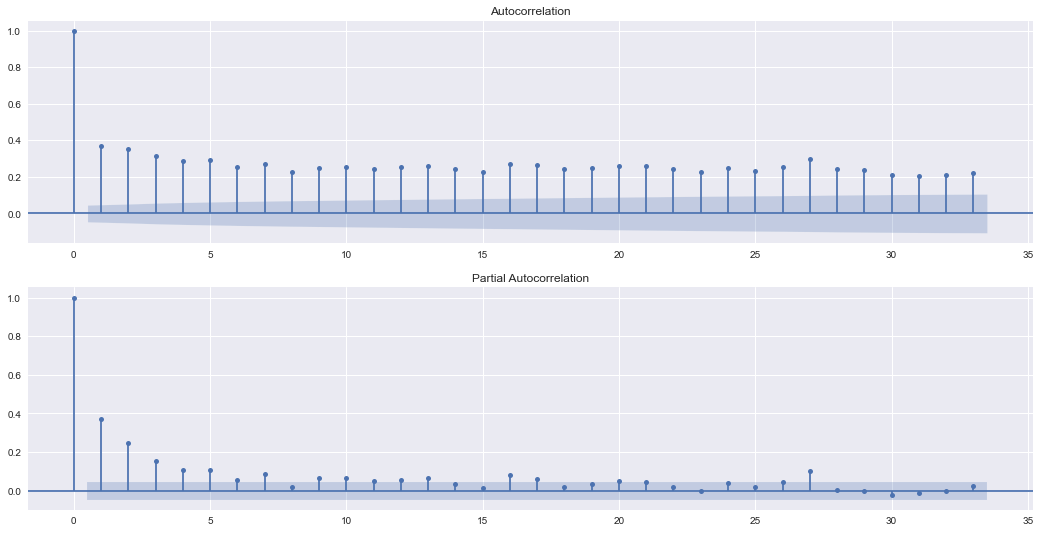

In [59]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar6['Brightness'], ax=ax[0])
plot_pacf(pulsar6['Brightness'], ax=ax[1], method="ols")

In [60]:
acf(pulsar6['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.37138454, 0.34994166, 0.31194031, 0.28665069,
       0.29048719, 0.25431929, 0.27167022, 0.22662943, 0.24809334,
       0.25146666])

In [61]:
acfpulsar6 = pd.DataFrame()
for lag in range(0,11):
    acfpulsar6[f"B_lag_{lag}"] = pulsar6['Brightness'].shift(lag)


acfpulsar6

,B_lag_0,B_lag_1,B_lag_2,B_lag_3,B_lag_4,B_lag_5,B_lag_6,B_lag_7,B_lag_8,B_lag_9,B_lag_10
0,0.101127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.012166,0.101127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.021918,0.012166,0.101127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.181179,0.021918,0.012166,0.101127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000240,0.181179,0.021918,0.012166,0.101127,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1814,0.105178,0.008539,0.053246,0.024587,0.004085,0.000947,0.044895,0.007906,0.048652,0.013009,0.006294
1815,0.064272,0.105178,0.008539,0.053246,0.024587,0.004085,0.000947,0.044895,0.007906,0.048652,0.013009
1816,0.000171,0.064272,0.105178,0.008539,0.053246,0.024587,0.004085,0.000947,0.044895,0.007906,0.048652
1817,-0.000924,0.000171,0.064272,0.105178,0.008539,0.053246,0.024587,0.004085,0.000947,0.044895,0.007906


In [62]:
acfpulsar6.corr()["B_lag_0"].values

array([1.        , 0.37158343, 0.35041747, 0.31258703, 0.28752434,
       0.29153195, 0.25533259, 0.27276504, 0.22759855, 0.2492633 ,
       0.25277541])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [63]:
held5ths = pulsar6[pulsar6.index % 5 == 0]
held5ths

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.101127,0.001893,1
5,6,0.085866,0.001723,1
10,11,0.123529,0.002026,1
15,16,0.029203,0.001918,0
20,21,0.042757,0.001891,0
...,...,...,...,...
1795,1796,0.004570,0.001779,0
1800,1801,0.002429,0.001749,0
1805,1806,0.013009,0.001764,0
1810,1811,0.004085,0.001713,0


In [64]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

0.07756883

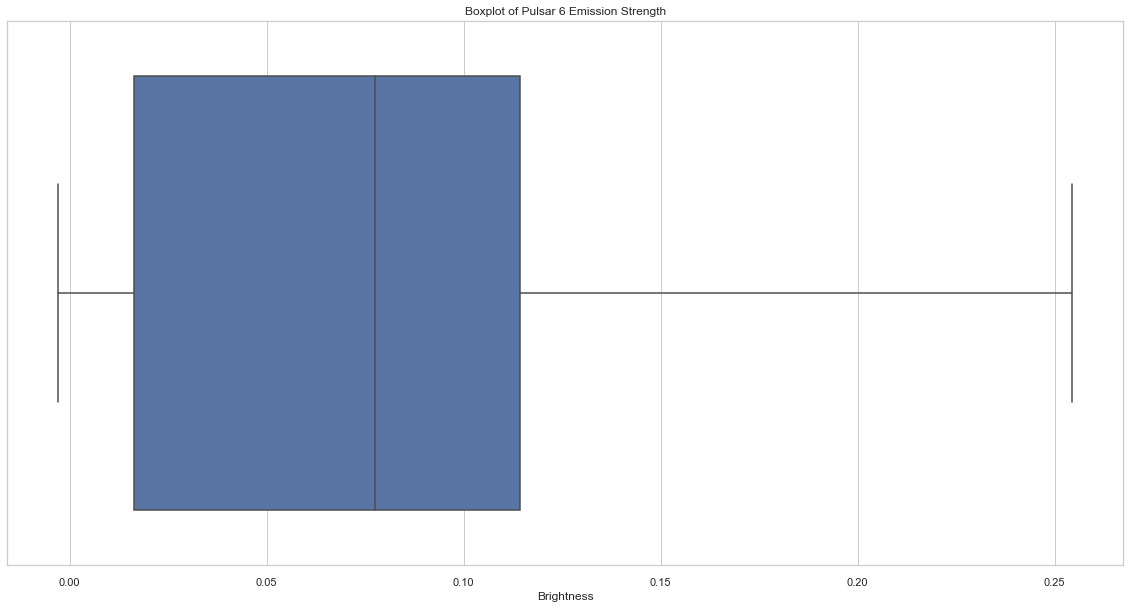

In [65]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


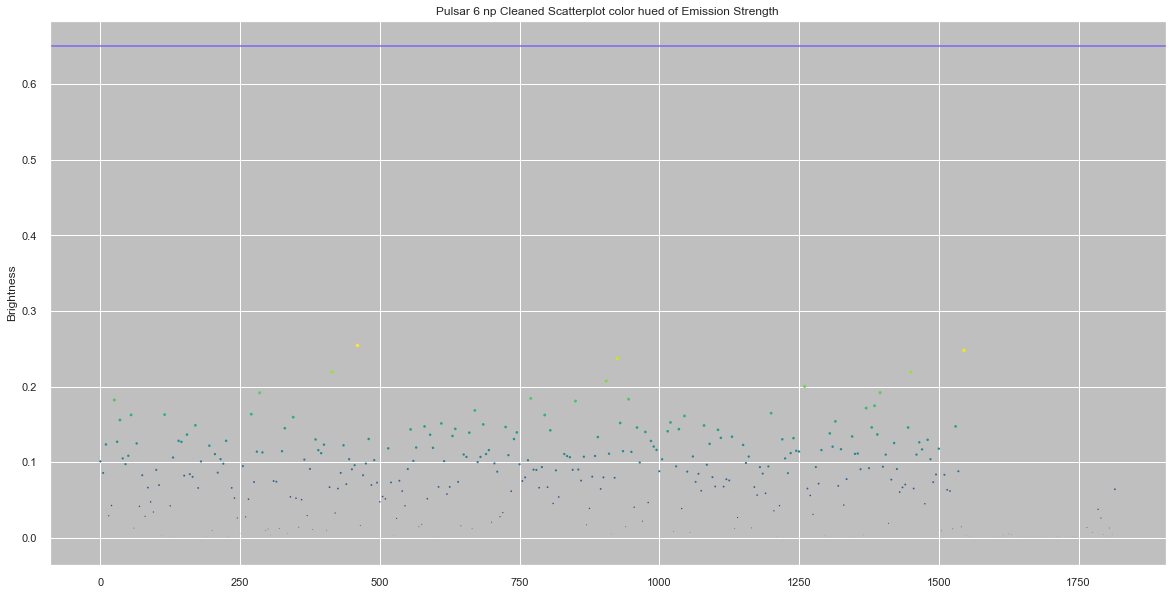

In [66]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')

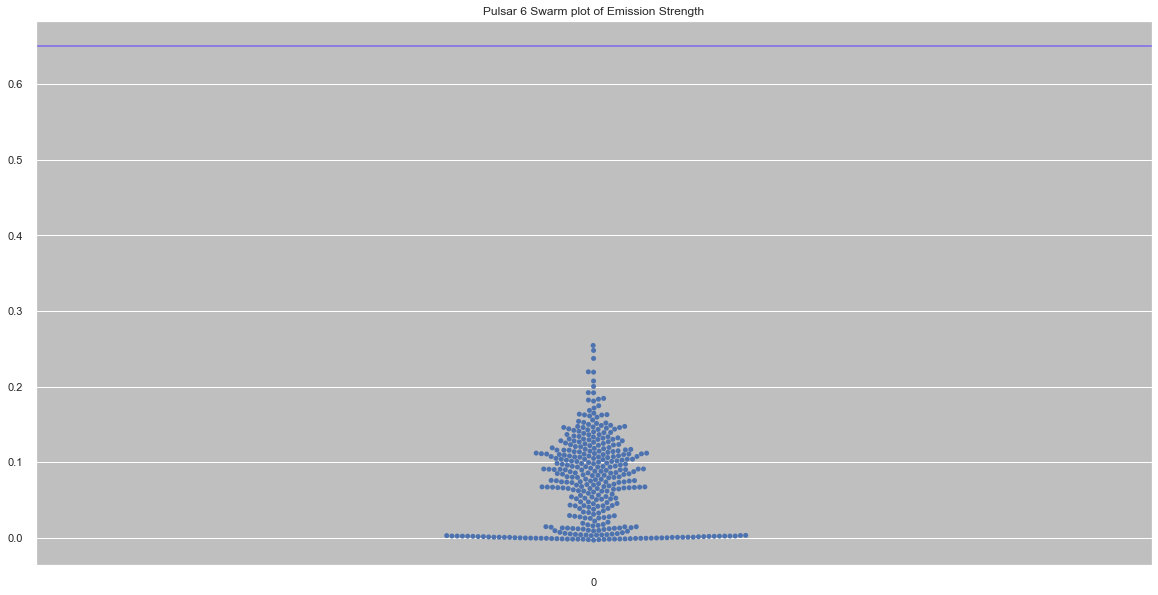

In [67]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=held5ths["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [68]:
print(len(held5ths[(held5ths.Brightness > 0.6508051)]))
print(len(held5ths[(held5ths.Brightness < 0.6508051)]))

0
364


#### isolating every 100 rows into discrete sets.

In [69]:
size = 100
N = int(len(pulsar6)/size)
pulsarsubframes = [pulsar6.iloc[i*size:(i+1)*size].copy() for i in range(N+1)]
#pulsarsubframes[-1]

frame1 = pulsarsubframes[0]
frame2 = pulsarsubframes[1]
frame3 = pulsarsubframes[2]
frame4 = pulsarsubframes[3]
frame5 = pulsarsubframes[4]
frame6 = pulsarsubframes[5]
frame7 = pulsarsubframes[6]

medianframe1 = frame1["Brightness"].median()
print("Median of Pulsar6: ", medianframe1)
frame1['Binary'] = np.where(frame1['Brightness'] > 0.6589028, 1, 0)

medianframe2 = frame2["Brightness"].median()
print("Median of Pulsar6: ", medianframe2)
frame2['Binary'] = np.where(frame2['Brightness'] > 0.6589028, 1, 0)

medianframe3 = frame3["Brightness"].median()
print("Median of Pulsar6: ", medianframe3)
frame3['Binary'] = np.where(frame3['Brightness'] > 0.6589028, 1, 0)

medianframe4 = frame4["Brightness"].median()
print("Median of Pulsar6: ", medianframe4)
frame4['Binary'] = np.where(frame4['Brightness'] > 0.6589028, 1, 0)

medianframe5 = frame5["Brightness"].median()
print("Median of Pulsar6: ", medianframe5)
frame5['Binary'] = np.where(frame5['Brightness'] > 0.6589028, 1, 0)

medianframe6 = frame6["Brightness"].median()
print("Median of Pulsar6: ", medianframe6)
frame6['Binary'] = np.where(frame6['Brightness'] > 0.6589028, 1, 0)

medianframe7 = frame7["Brightness"].median()
print("Median of Pulsar6: ", medianframe7)
frame7['Binary'] = np.where(frame7['Brightness'] > 0.6589028, 1, 0)

Median of Pulsar6:  0.09038107
Median of Pulsar6:  0.08974581000000001
Median of Pulsar6:  0.08240977
Median of Pulsar6:  0.066563445
Median of Pulsar6:  0.08777251999999999
Median of Pulsar6:  0.07644756
Median of Pulsar6:  0.098015765


In [70]:
framebinary = []

In [71]:
print(frame1)

storeover1 = len(frame1[(frame1.Brightness > frame1["Brightness"].median())])
storeunder1 = len(frame1[(frame1.Brightness < frame1["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

    Pulse Number  Brightness  Uncertainty  Binary
0              1    0.101127     0.001893       0
1              2    0.012166     0.001814       0
2              3    0.021918     0.001835       0
3              4    0.181179     0.002183       0
4              5    0.000240     0.001725       0
..           ...         ...          ...     ...
95            96    0.034161     0.001919       0
96            97    0.062236     0.001736       0
97            98    0.040008     0.001803       0
98            99    0.034298     0.001881       0
99           100    0.118542     0.001894       0

[100 rows x 4 columns]


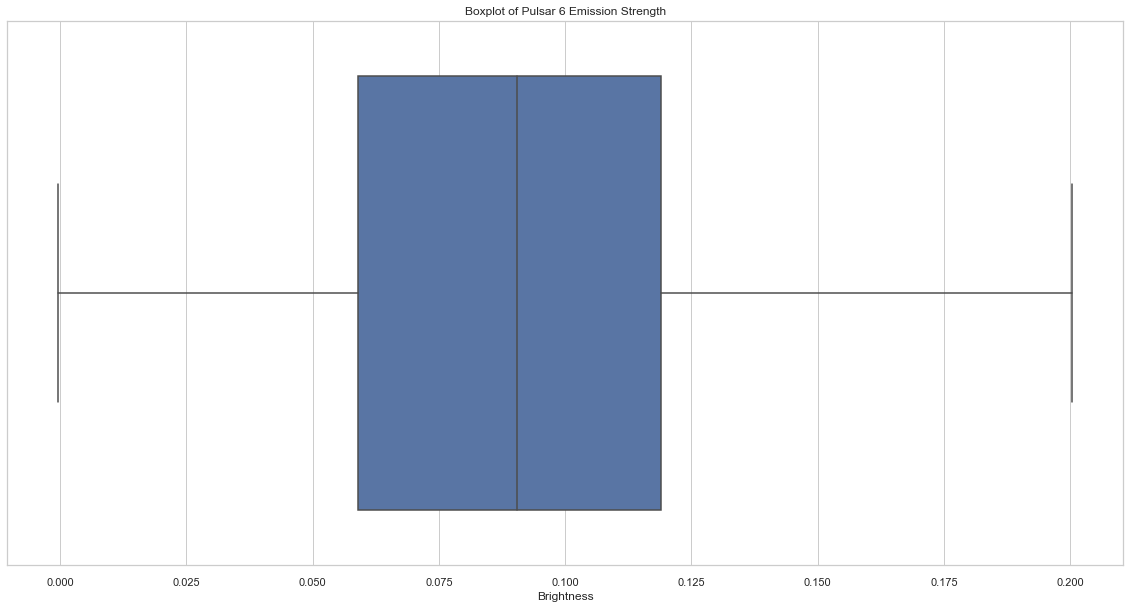

In [72]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame1["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


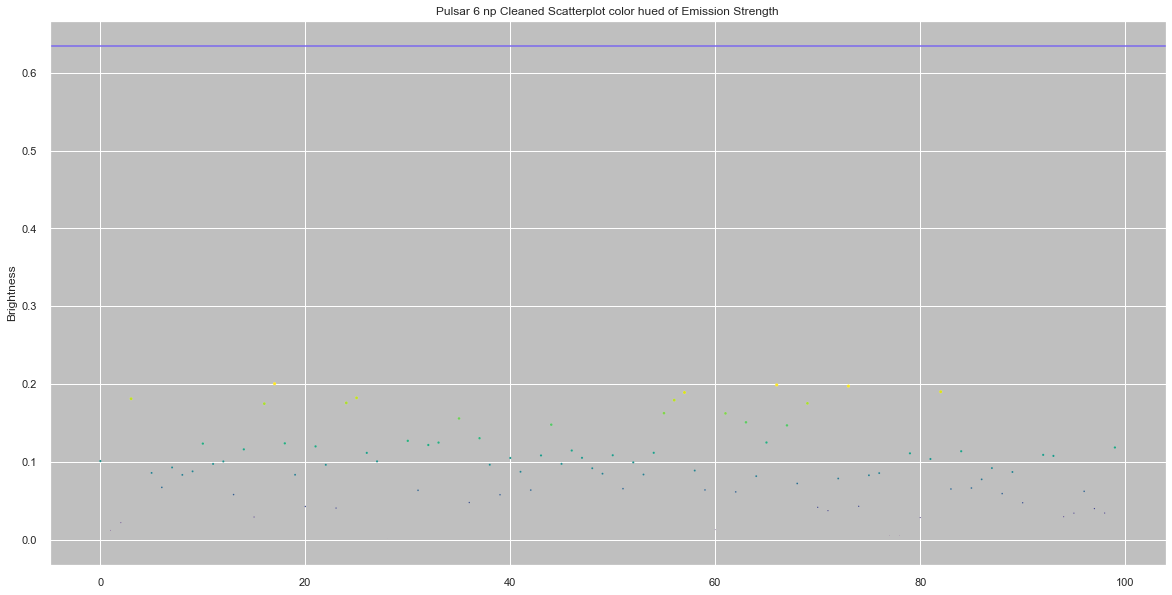

In [73]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame1.Brightness.values
ax = sns.scatterplot(data=frame1["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.63457545, ls='-',c='mediumslateblue')

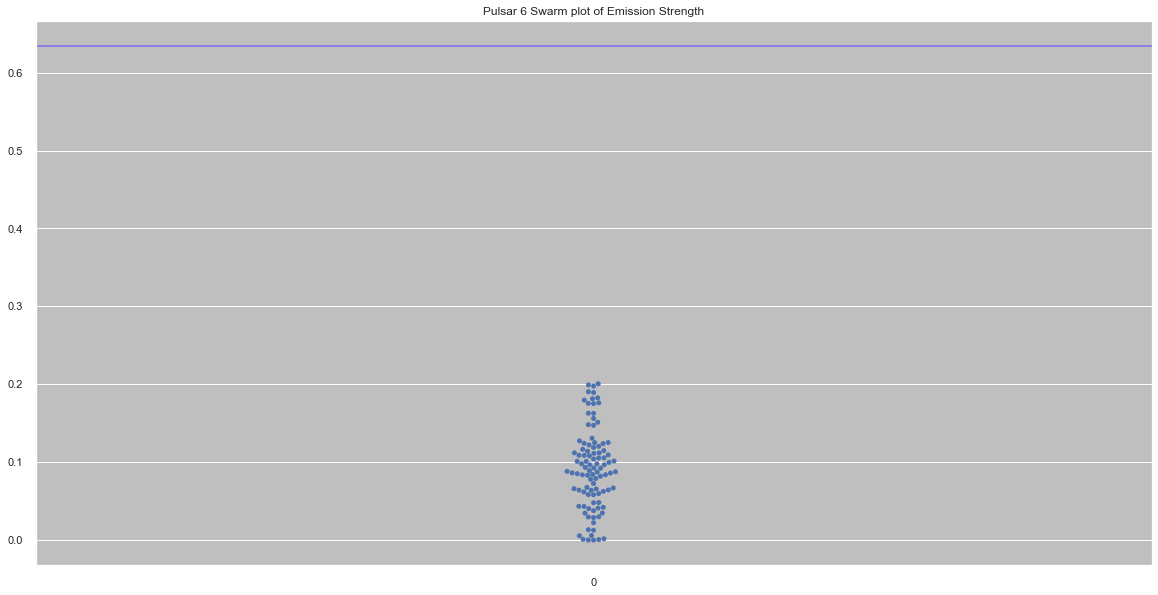

In [74]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame1.Brightness.values
ax = plt.axhline( y=0.63457545, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=frame1["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [75]:
print(frame2)

storeover1 = len(frame2[(frame2.Brightness > frame2["Brightness"].median())])
storeunder1 = len(frame2[(frame2.Brightness < frame2["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
100           101    0.089866     0.001798       0
101           102    0.070336     0.001796       0
102           103    0.157476     0.001746       0
103           104    0.183206     0.004180       0
104           105    0.109624     0.001821       0
..            ...         ...          ...     ...
195           196    0.121939     0.001749       0
196           197    0.068628     0.001871       0
197           198    0.216338     0.003297       0
198           199    0.126326     0.002008       0
199           200    0.100401     0.002170       0

[100 rows x 4 columns]


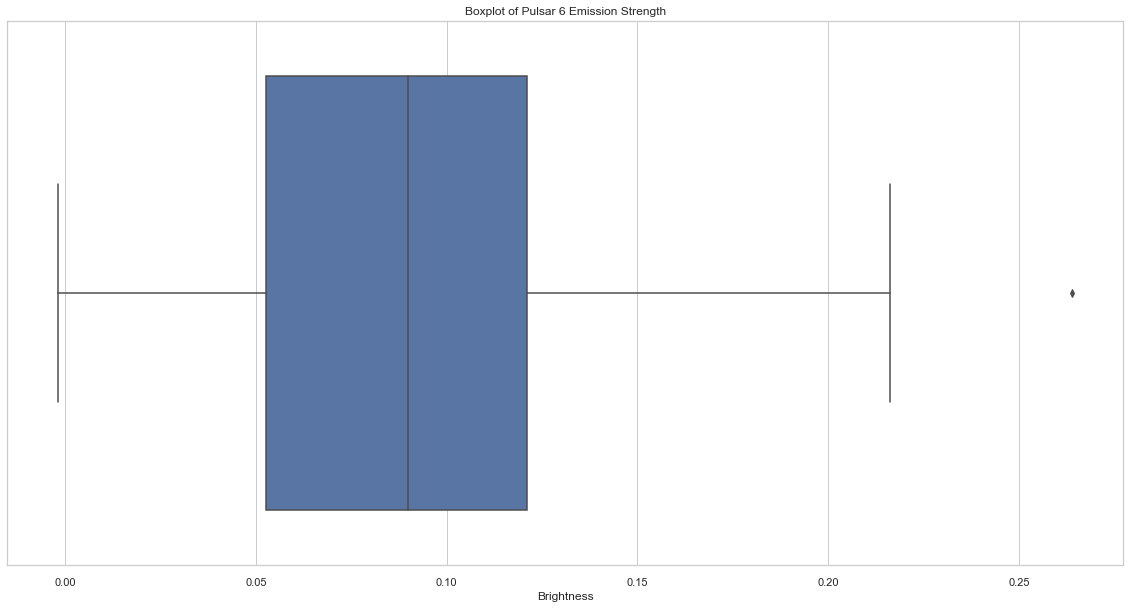

In [76]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame2["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


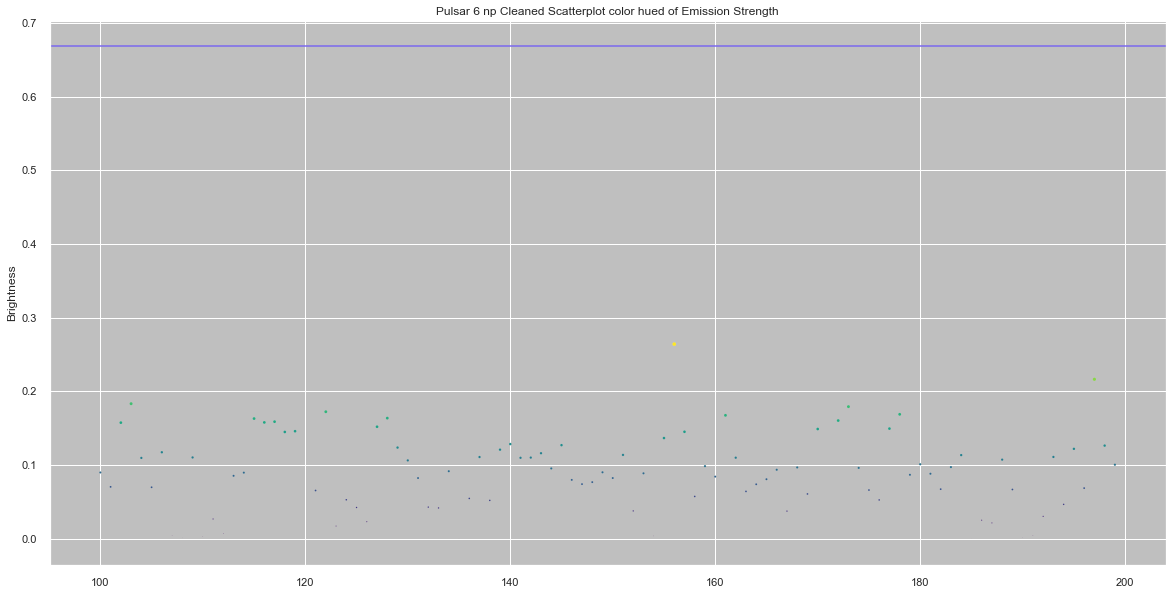

In [77]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame2.Brightness.values
ax = sns.scatterplot(data=frame2["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6688056, ls='-',c='mediumslateblue')

In [78]:
print(frame3)

storeover1 = len(frame3[(frame3.Brightness > frame3["Brightness"].median())])
storeunder1 = len(frame3[(frame3.Brightness < frame3["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
200           201    0.009444     0.001735       0
201           202    0.065355     0.002142       0
202           203    0.094616     0.001808       0
203           204    0.053825     0.001844       0
204           205    0.121391     0.002186       0
..            ...         ...          ...     ...
295           296    0.009826     0.001811       0
296           297    0.108146     0.001893       0
297           298    0.056162     0.001874       0
298           299    0.109828     0.002043       0
299           300    0.055834     0.001985       0

[100 rows x 4 columns]


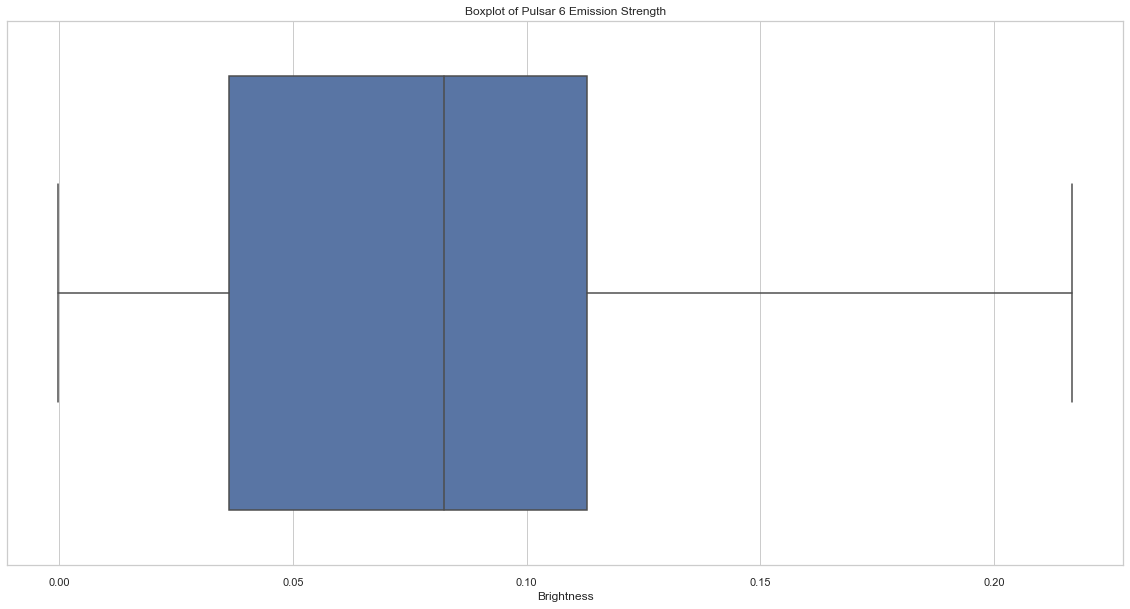

In [79]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame3["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


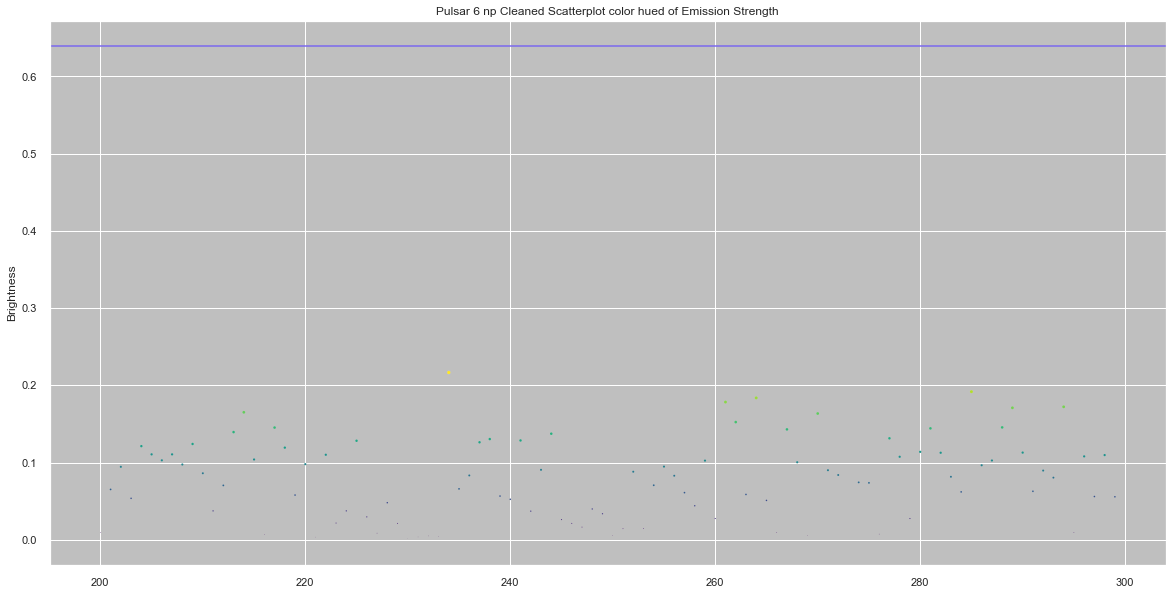

In [80]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame3.Brightness.values
ax = sns.scatterplot(data=frame3["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.63955675, ls='-',c='mediumslateblue')

In [81]:
print(frame4)

storeover1 = len(frame4[(frame4.Brightness > frame4["Brightness"].median())])
storeunder1 = len(frame4[(frame4.Brightness < frame4["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
300           301    0.011567     0.001765       0
301           302    0.046221     0.001977       0
302           303    0.026557     0.001838       0
303           304    0.125034     0.002060       0
304           305    0.009373     0.001773       0
..            ...         ...          ...     ...
395           396    0.112015     0.001804       0
396           397    0.102049     0.002015       0
397           398    0.112097     0.001889       0
398           399    0.061686     0.001938       0
399           400    0.038349     0.001927       0

[100 rows x 4 columns]


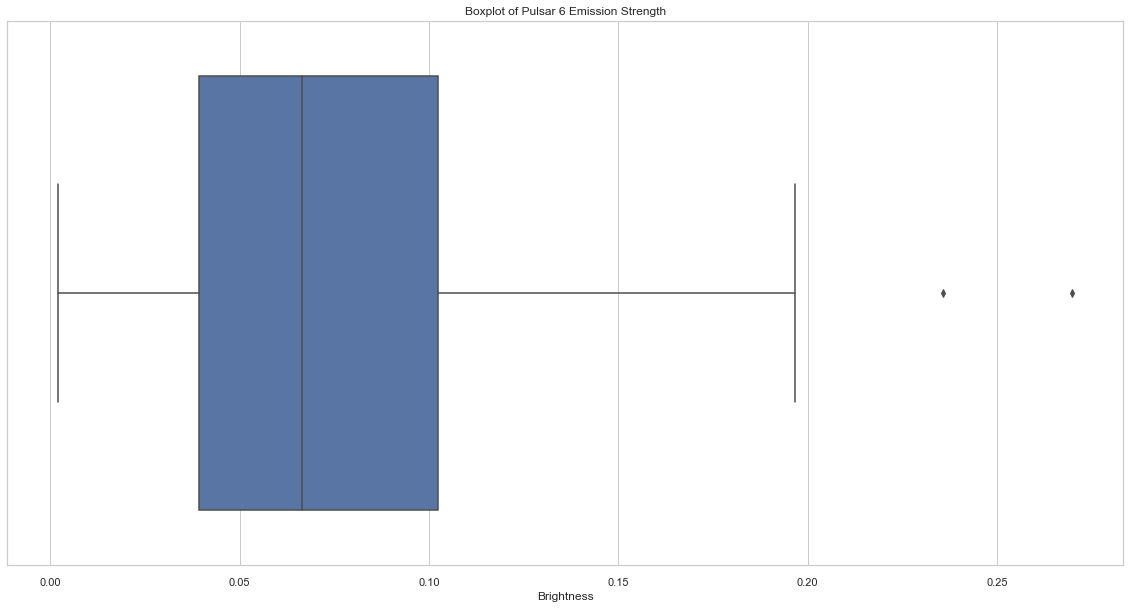

In [82]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame4["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

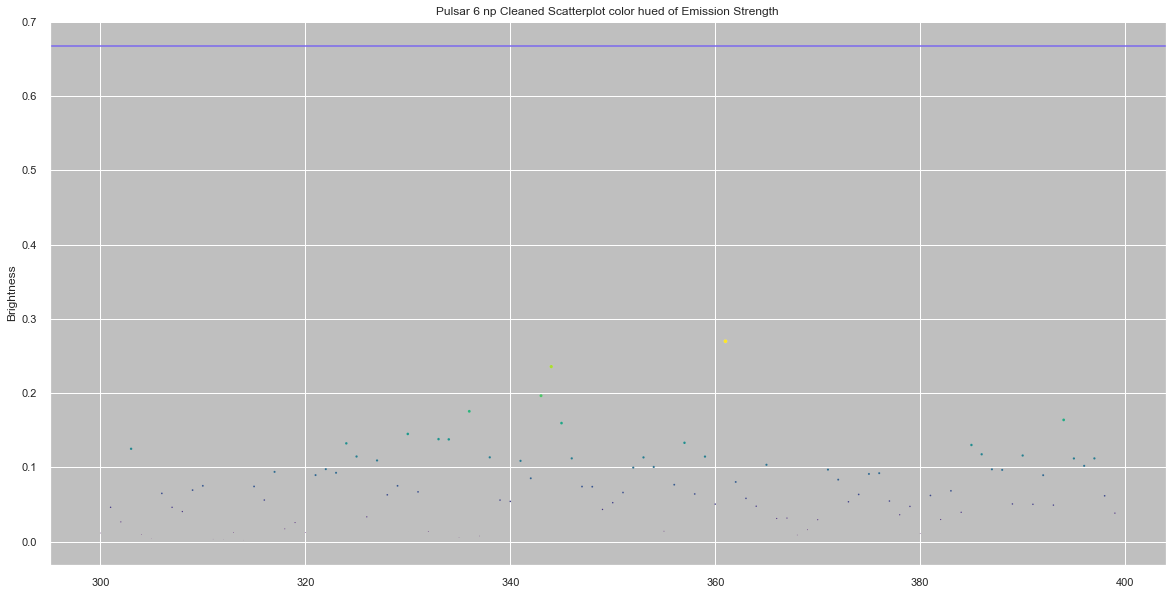

In [83]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame4.Brightness.values
ax = sns.scatterplot(data=frame4["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.66777675, ls='-',c='mediumslateblue')

In [84]:
print(frame5)

storeover1 = len(frame5[(frame5.Brightness > frame5["Brightness"].median())])
storeunder1 = len(frame5[(frame5.Brightness < frame5["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
400           401    0.123243     0.001922       0
401           402    0.060497     0.002066       0
402           403    0.064231     0.001941       0
403           404    0.085174     0.001741       0
404           405    0.183767     0.002531       0
..            ...         ...          ...     ...
495           496    0.073064     0.001777       0
496           497    0.135849     0.002546       0
497           498    0.149264     0.001870       0
498           499    0.003222     0.001752       0
499           500    0.027090     0.001874       0

[100 rows x 4 columns]


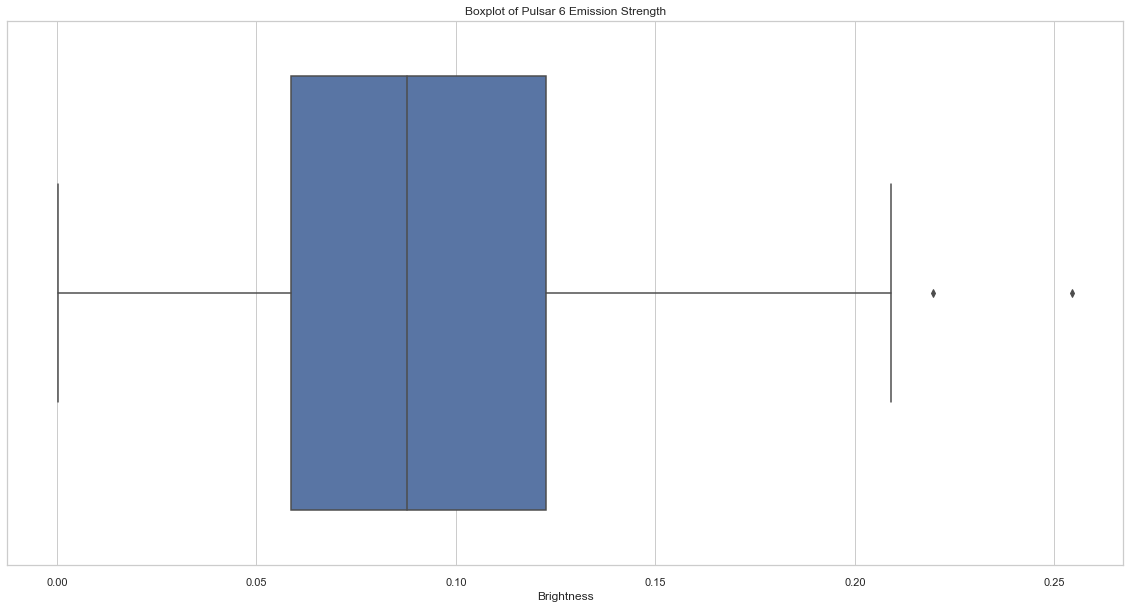

In [85]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame5["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

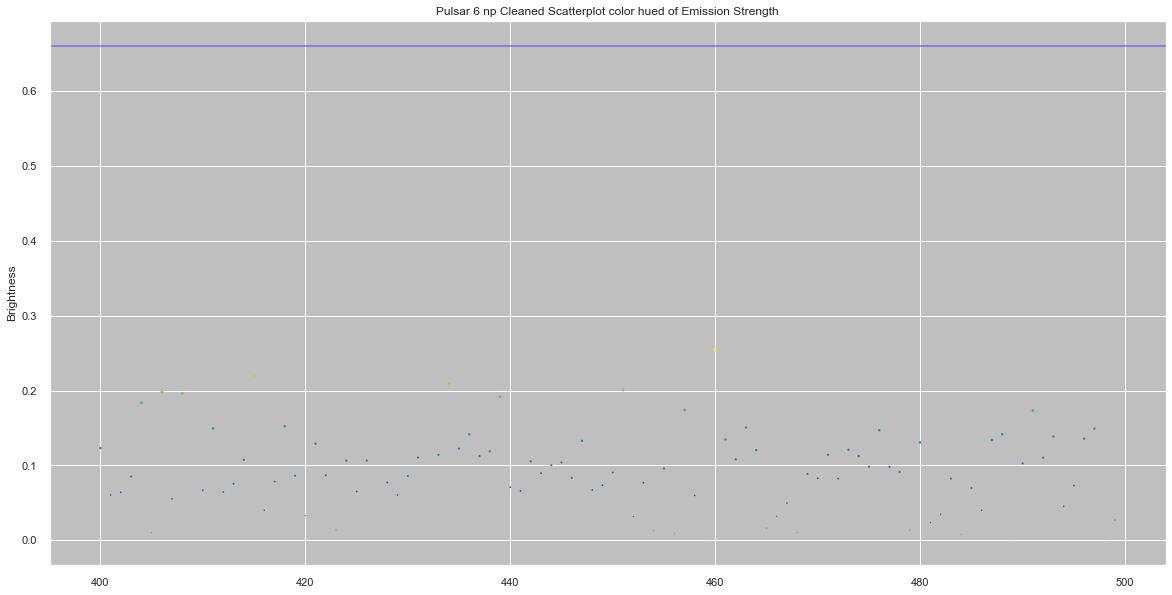

In [86]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame5.Brightness.values
ax = sns.scatterplot(data=frame5["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6605900499999999, ls='-',c='mediumslateblue')

In [87]:
print(frame6)

storeover1 = len(frame6[(frame6.Brightness > frame6["Brightness"].median())])
storeunder1 = len(frame6[(frame6.Brightness < frame6["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
500           501    0.047617     0.001927       0
501           502    0.166427     0.002756       0
502           503    0.131843     0.001837       0
503           504    0.080962     0.001844       0
504           505    0.044656     0.001831       0
..            ...         ...          ...     ...
595           596    0.119056     0.002027       0
596           597    0.114373     0.001738       0
597           598    0.062286     0.001755       0
598           599    0.104101     0.001864       0
599           600    0.030726     0.002112       0

[100 rows x 4 columns]


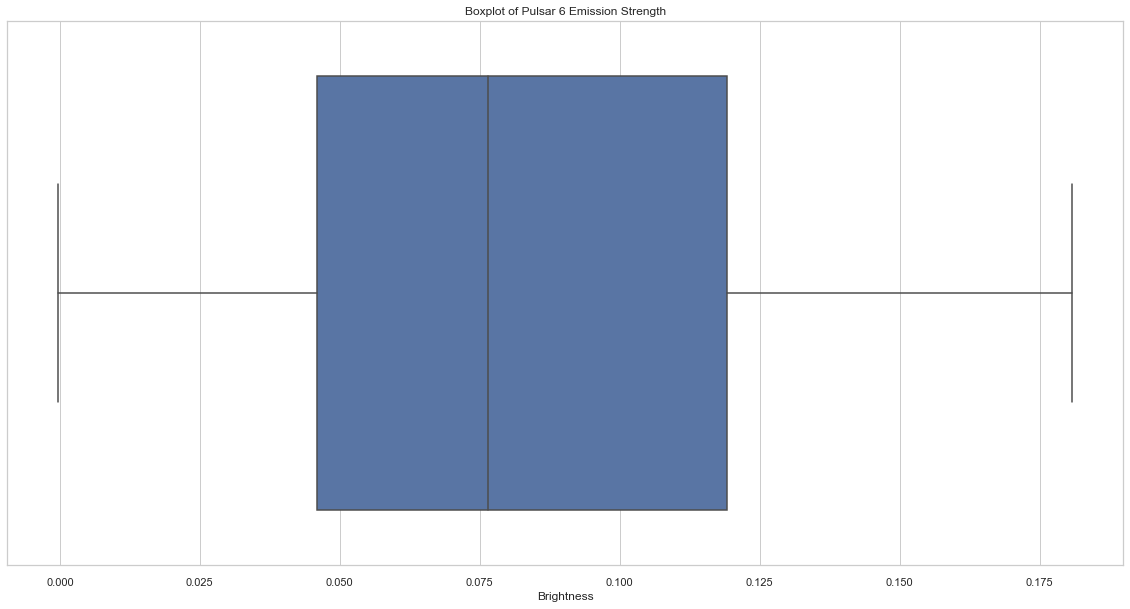

In [88]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame6["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


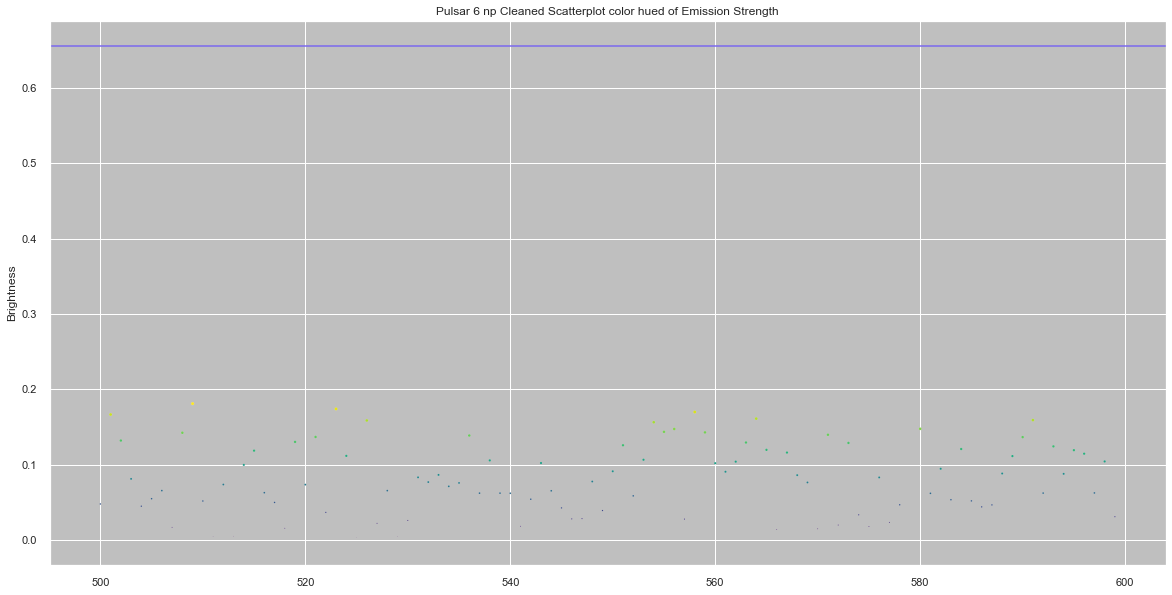

In [89]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame6.Brightness.values
ax = sns.scatterplot(data=frame6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.65585835, ls='-',c='mediumslateblue')

In [90]:
print(frame7)

storeover1 = len(frame7[(frame7.Brightness > frame7["Brightness"].median())])
storeunder1 = len(frame7[(frame7.Brightness < frame7["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
600           601    0.001442     0.001693       0
601           602    0.051654     0.001910       0
602           603    0.066443     0.002020       0
603           604    0.017327     0.001720       0
604           605    0.105838     0.001845       0
..            ...         ...          ...     ...
695           696    0.116071     0.001903       0
696           697    0.109431     0.001995       0
697           698    0.054733     0.001937       0
698           699    0.027245     0.001827       0
699           700    0.031100     0.002066       0

[100 rows x 4 columns]


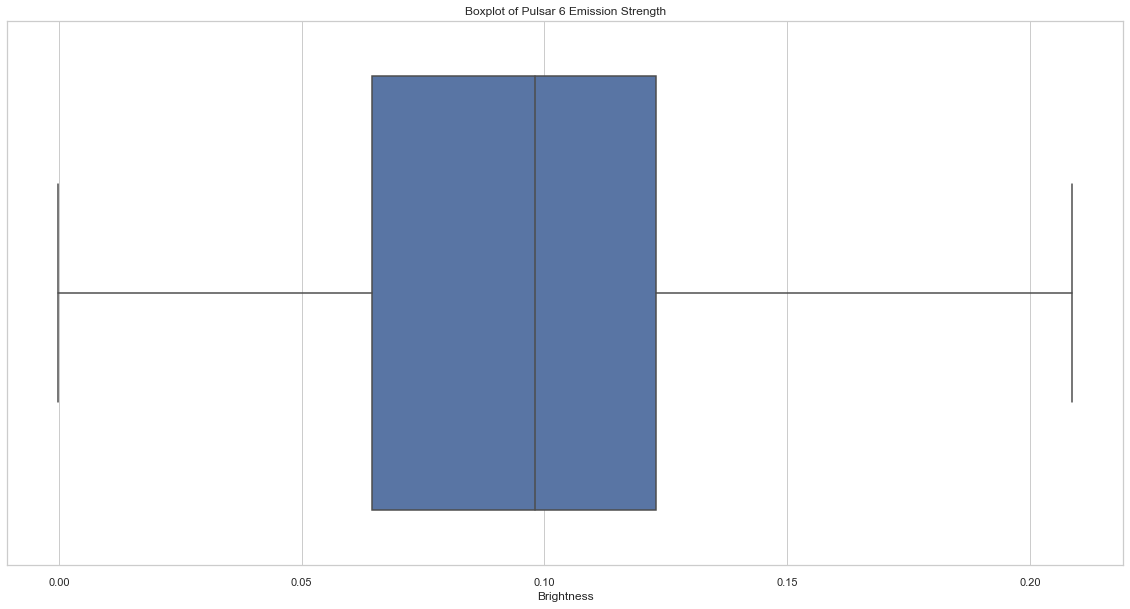

In [91]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame7["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


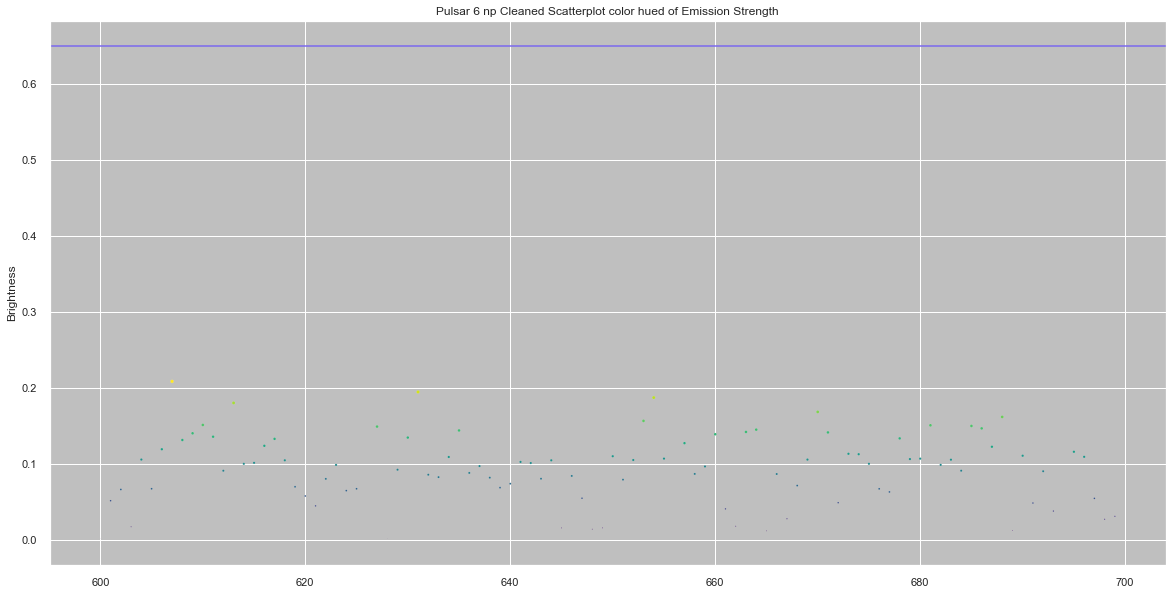

In [92]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame7.Brightness.values
ax = sns.scatterplot(data=frame7["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6504474499999999, ls='-',c='mediumslateblue')

In [93]:
framebinary
#this didn't go to plan.

[0, 0, 0, 0, 0, 0, 0]

#### Randomness testing

In [94]:
np.savetxt(r'framebinarypulsar4.txt', framebinary, fmt='%d', delimiter='')
np.savetxt(r'every5thbinarypulsar4.txt', held5ths.Binary, fmt='%d', delimiter='')
np.savetxt(r'allpulsar4.txt', pulsar6.Binary, fmt='%d', delimiter='')
np.savetxt(r'npcleanedpulsar4.txt', pulsar6npcleaned.Binary, fmt='%d', delimiter='')